In [177]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats

In [179]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [181]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

C:\Users\kaleg\AppData\Local\Temp\ipykernel_19264\2595122914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [233]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [234]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [236]:
x_train.shape,x_test.shape

((712, 2), (179, 2))

In [237]:
#distribution of age

C:\Users\kaleg\AppData\Local\Temp\ipykernel_19264\718055844.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


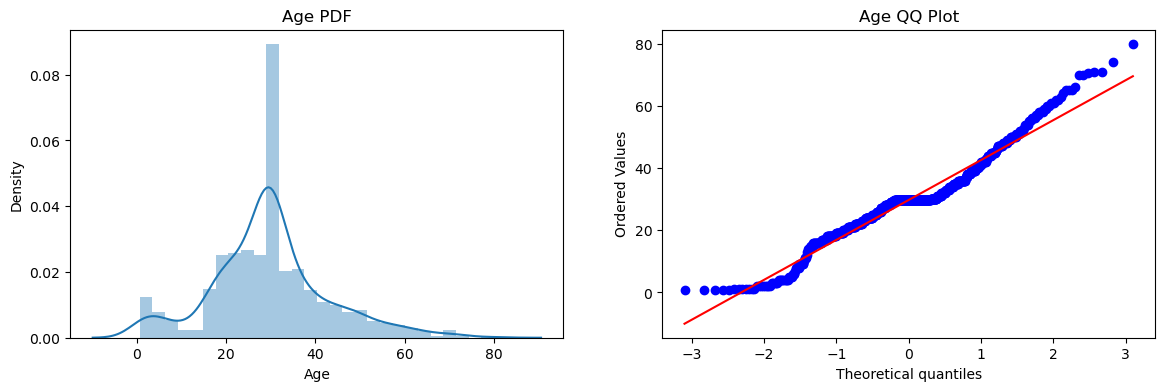

In [193]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\kaleg\AppData\Local\Temp\ipykernel_19264\1381409851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Fare"])


Text(0.5, 1.0, 'Fare PDF')

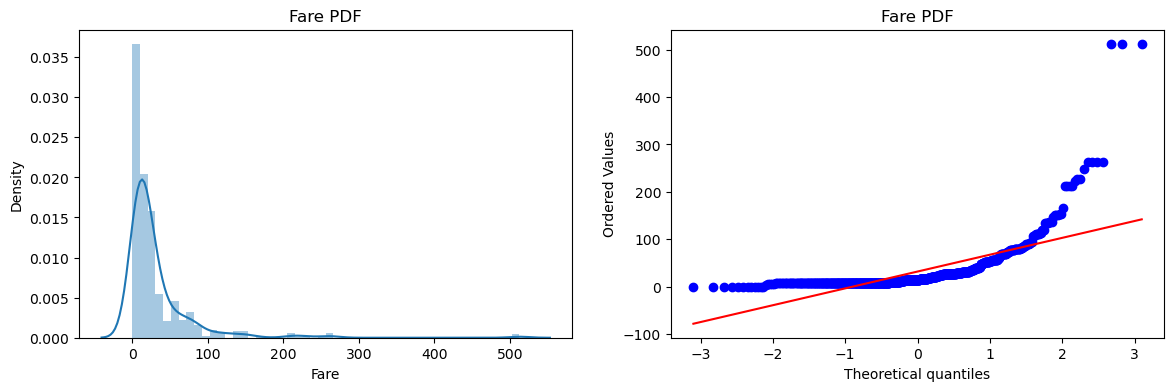

In [195]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(x_train["Fare"],dist="norm",plot=plt)
plt.title("Fare PDF")

In [197]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()

dt.fit(x_train,y_train)
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [199]:
y_pred=dt.predict(x_test)
y_pred1=lr.predict(x_test)

In [201]:
print("Decisiontree classifier",accuracy_score(y_test,y_pred))
print("logistic regression",accuracy_score(y_test,y_pred1))

Decisiontree classifier 0.6759776536312849
logistic regression 0.6983240223463687


# log Transformation

### Now we will do log transform

- for doing transformation we have to pass function in the class

In [203]:
ft=FunctionTransformer(func=np.log1p)

In [205]:
x_train_transform=ft.fit_transform(x_train)
x_test_transform=ft.transform(x_test)

In [207]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()

dt.fit(x_train_transform,y_train)
lr.fit(x_train_transform,y_train)

y_pred=dt.predict(x_test_transform)
y_pred1=lr.predict(x_test_transform)

print("Decisiontree classifier",accuracy_score(y_test,y_pred))
print("logistic regression",accuracy_score(y_test,y_pred1))

Decisiontree classifier 0.6759776536312849
logistic regression 0.7039106145251397


In [209]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transform,y_train)
clf2.fit(x_train_transform,y_train)
    
y_pred = clf.predict(x_test_transform)
y_pred1 = clf2.predict(x_test_transform)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7039106145251397
Accuracy DT 0.664804469273743


### cross validation

- so basically cross validation do train_test_split many time and train the model and check the accuracy
- cv means how many time we have to do this
- we have to pass here model,x,y,cv,scoring
- then we just calculate mean of these values

In [211]:
x_transformed=ft.transform(x)

In [213]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("logistic",np.mean(cross_val_score(clf,x_transformed,y,cv=10,scoring="accuracy")))
print("decision",np.mean(cross_val_score(clf2,x_transformed,y,cv=10,scoring="accuracy")))

logistic 0.678027465667915
decision 0.655505617977528


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

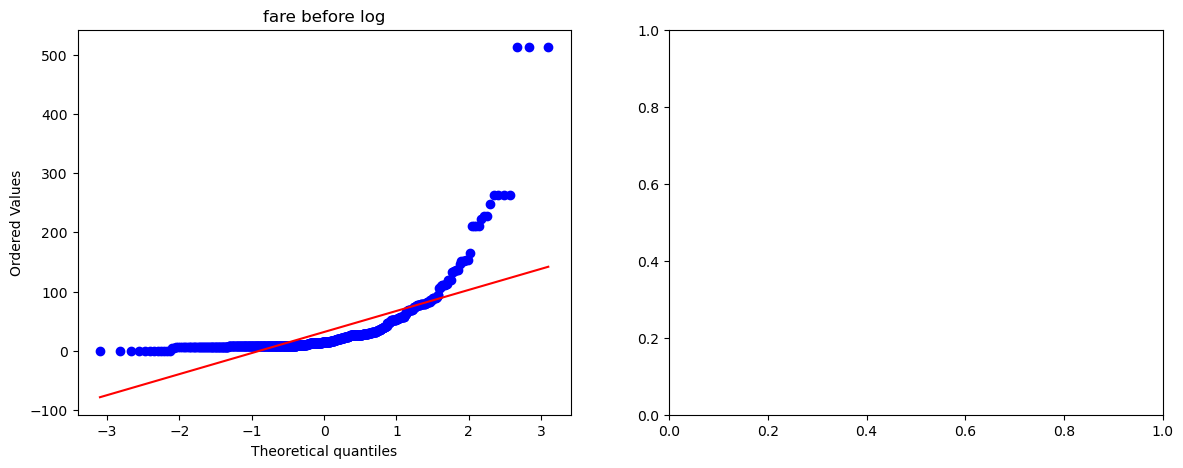

In [218]:
plt.figure(figsize=(14,5))
plt.subplot(121)
stats.probplot(x_train["Fare"],dist="norm",plot=plt)
plt.title("fare before log")

plt.subplot(122)
stats.probplot(x_train_transform["Fare"],dist="norm",plot=plt)
plt.title("fare after log")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

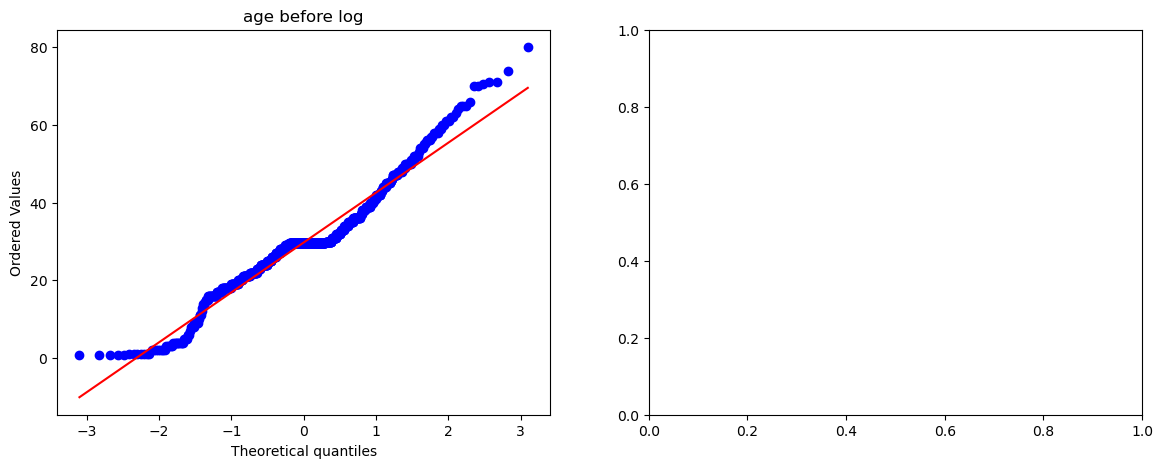

In [219]:
plt.figure(figsize=(14,5))
plt.subplot(121)
stats.probplot(x_train["Age"],dist="norm",plot=plt)
plt.title("age before log")

plt.subplot(122)
stats.probplot(x_train_transform["Age"],dist="norm",plot=plt)
plt.title("age after log")
plt.show()

In [223]:
trf=ColumnTransformer(transformers=[
    ("log",FunctionTransformer(func=np.log1p),["Fare"])
]
,remainder="passthrough")

In [224]:
x_train_transform=trf.fit_transform(x_train)
x_test_transform=trf.transform(x_test)

In [225]:
x_train_transform_df=pd.DataFrame(x_train_transform,columns=x_train.columns)
x_test_transform_df=pd.DataFrame(x_test_transform,columns=x_test.columns)

In [226]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transform_df,y_train)
clf2.fit(x_train_transform_df,y_train)

y_pred=clf.predict(x_test_transform_df)
y_pred1=clf2.predict(x_test_transform_df)

print("logistic",accuracy_score(y_test,y_pred))
print("tree",accuracy_score(y_test,y_pred))

logistic 0.6815642458100558
tree 0.6815642458100558


In [227]:
# now we will apply cross val score

In [228]:
x_transform=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("logistic",np.mean(cross_val_score(clf,x_transform,y,scoring="accuracy",cv=10)))
print("tree",np.mean(cross_val_score(clf2,x_transform,y,scoring="accuracy",cv=10)))

logistic 0.6712609238451936
tree 0.6700749063670413


In [266]:
def apply_transform(transform):
    x=df.iloc[:,1:]
    y=df.iloc[:,0]
    print(x)

    trf=ColumnTransformer(transformers=[
        ("log",FunctionTransformer(func=transform),[1])
    ],remainder="passthrough")
    
    x_transform=trf.fit_transform(x)
    clf=LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,x_transform_df,y,cv=10,scoring="accuracy")))
    
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    stats.probplot(x["Fare"],dist="norm",plot=plt)
    plt.title("fare before tarnsform")

    plt.subplot(122)
    stats.probplot(x_transform[:,0],dist="norm",plot=plt)
    plt.title("fare after transform")

In [267]:
apply_transform(lambda x : x**2)

           Age     Fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns]


NameError: name 'x_transform_df' is not defined

In [254]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6431335830212235


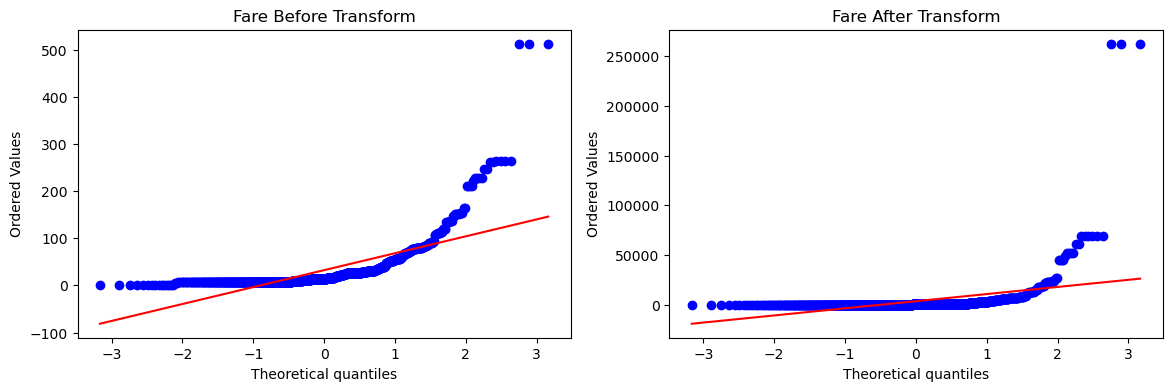

In [255]:
apply_transform(lambda x:x**2)